# Project: Investigate No-show Appointments Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
The dataset that will be used for this project is called **"No-show appointments"** and its original source is on Kaggle. This dataset contains information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row. The dataset column labelled, **‘ScheduledDay’** tells us on what day the patient sets up their appointment. The column labelled, **‘Neighborhood’** indicates the location of the hospital. The column labelled, **‘Scholarship’** indicates whether or not the patient is enrolled in the Brasilian welfare program called Bolsa Família.

__NB:__ The dataset has an encoding in the last column labelled, **‘No-show’** that says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up. 


### Question for Analysis
What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [2]:
# load dataset and view the first few rows
df = pd.read_csv('C:/Users/Rockyfella Daniel/Downloads/noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# checking for the dimension of the dataframe
df.shape

(110527, 14)

In [4]:
# checking the datatypes of the respective columns
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [5]:
# checking the datatype of both ScheduledDay and AppointmentDay
type(df['ScheduledDay'] [3])

type(df['AppointmentDay'] [4])

str

In [6]:
# concise summary of the dataframe including number of non-null values in each of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
# checking for the number of unique values in each of the columns
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [8]:
# checking useful descriptive statistics for each of the columns 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Report on the Data Wrangling Phase
First, I imported the packages I intend to use in my analysis process. After that, I loaded the data file to my jupyter notebook and viewed the first few rows of the dataset before inspecting it for missing or errant values. I inspected the dataset by checking for its dimension, the datatypes of the different columns, the concise information of my dataframe, the number of unique values of each of the columns and the descriptive statistics (which includes the mean, standard deviation, minimum value, median, maximum value, etc.) of the columns with numeric values before proceeding to the next phase which is the data cleaning.

### Data Cleaning 

In [9]:
# Using date function to convert ScheduledDay and AppointmentDay from string format to date format
df['ScheduledDay'] = pd.to_datetime(df["ScheduledDay"]).dt.date
type(df['ScheduledDay'] [3])

df['AppointmentDay'] = pd.to_datetime(df["AppointmentDay"]).dt.date
type(df['AppointmentDay'] [4])

datetime.date

In [10]:
# checking for outliers (rows that have negative values) in "Age"
df.query('Age < 0').index

Int64Index([99832], dtype='int64')

In [11]:
# dropping the row with outlier (negative value) for "Age"
df.drop(99832, inplace=True)

In [12]:
# checking for the number of duplicates in the "PatientID" column
sum(df.duplicated(['PatientId']))

48228

In [13]:
# dropping the rows of the "PatientId" column with duplicate values
df.drop_duplicates(subset= 'PatientId', inplace= True)

In [14]:
# confirm whether there are still duplicate values in the "PatientId" column
sum(df.duplicated(['PatientId']))

0

In [15]:
# dropping the columns that have no impact on whether patients show or not show up for their appointments
df.drop(['PatientId','AppointmentID'], axis = 1, inplace =True)

In [16]:
# confirming the new dimension of the dataframe
df.shape

(62298, 12)

### Report on the Data Cleaning Phase
I started this phase by converting the datatype of the ScheduledDay and AppointmentDay from string format to date format using the date function. I checked for outliers in the Age column based on my finding in the descriptive statistics and I dropped the single row with the outlier which has a negative value. I then dropped rows with duplicate values in the PatientId column to avoid conflicting issues of analyzing the same patients repeatedly. I finally dropped the columns that had no impact on our prediction which is the PatientId and the AppointmentId columns respectively before rechecking the new dimension of my dataframe.

<a id='eda'></a>
## Exploratory Data Analysis

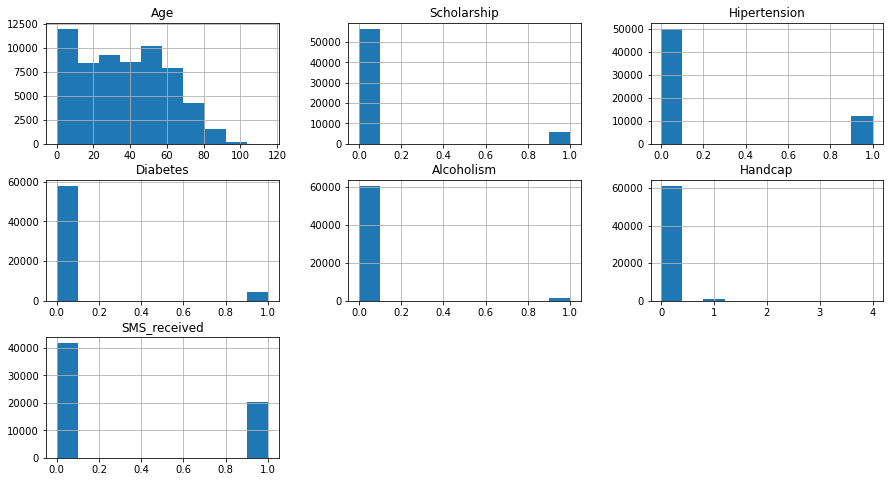

In [17]:
df.hist(figsize= (15,8));

The above visualization shows the different distributions of the factors that are important for us to know in order to predict if a patient will show up for their scheduled appointment.

### What is the average age of patients that showed up for their appointments?

In [18]:
# creating a dataframe for the number of patients that showed up for their appointment
df_show = df[df['No-show'] == 'No']
df_show['Age'].mean()

37.401975850713505

From the above analysis to determine the average age of patients that showed up for their appointments, it can be seen that the average age of patients that showed up for their appointment is 37.

### What is the average age of patients that did not show up for their appointments?

In [19]:
# creating a dataframe for the number of patients that did not show up for their appointment
df_noshow = df[df['No-show'] == 'Yes']
df_noshow['Age'].mean()

33.84343475764783

From the above analysis to determine the average age of patients that did not show up for their appointments, it can be seen that the average age of patients that did not show up for their appointment is 34.

### Does patients gender determine whether they show up for their appointments or not?

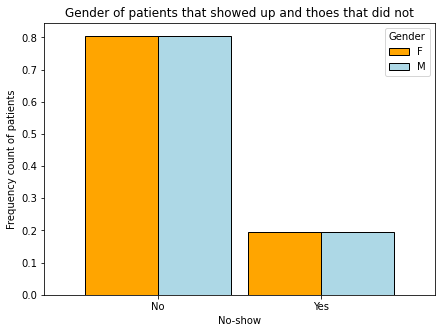

In [20]:
# Plot the gender of patients that show up for their appointments and those that did not
df.groupby('Gender')['No-show'].value_counts(normalize=True).unstack('Gender').plot.bar(edgecolor='black',
                                                                                       figsize=[7, 5],
                                                                                       rot=0,
                                                                                       width=0.9,
                                                                                       color=['orange', 'lightblue']);
plt.title('Gender of patients that showed up and thoes that did not')
plt.ylabel('Frequency count of patients');

The above plot shows that the gender of the patients does not determine whether they show up for their appointments or not.

### Does the patients ages determine whether they show up for their appointments or not?

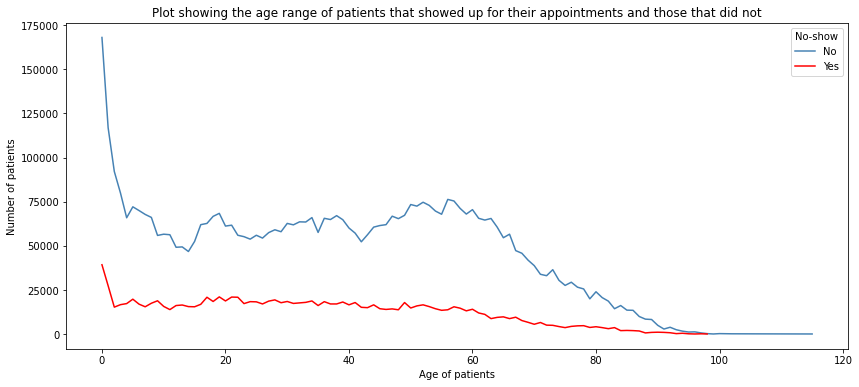

In [21]:
# Plot the age range of patients that showed for their appointments and those that did not
df.groupby('Age')['No-show'].value_counts().unstack('No-show').mul(100).plot(figsize=[14, 6],color=['steelblue','r'])
plt.title('Plot showing the age range of patients that showed up for their appointments and those that did not')
plt.xlabel('Age of patients')
plt.ylabel('Number of patients');

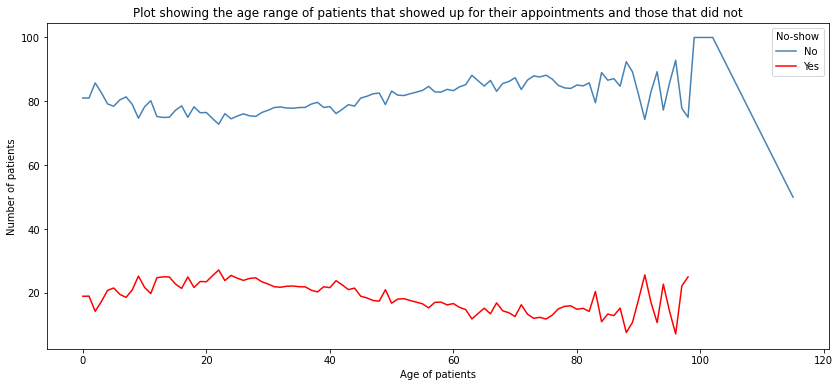

In [22]:
# Normalize the plot of age range of patients that showed for their appointments and those that did not
df.groupby('Age')['No-show'].value_counts(normalize=True).unstack('No-show').mul(100).plot(figsize=[14, 6],color=['steelblue','r'])
plt.title('Plot showing the age range of patients that showed up for their appointments and those that did not')
plt.xlabel('Age of patients')
plt.ylabel('Number of patients');

From the above visualization, it can be seen that a greater percentage of patients that did not show up for their appointment were young people between the ages of 0 to 40 years as compared to the older patients whose ages were above 40 years.

In [23]:
# changing the string values of "No-show" column to 1 and 0
df['No-show'].replace({'No':1,'Yes':0}, inplace = True)

In [24]:
# Relationship between SMS_received and No-show columns using unstack method
df.groupby('SMS_received')['No-show'].value_counts(normalize=True).mul(100).round(2).unstack()

No-show,0,1
SMS_received,,
0,15.99,84.01
1,26.92,73.08


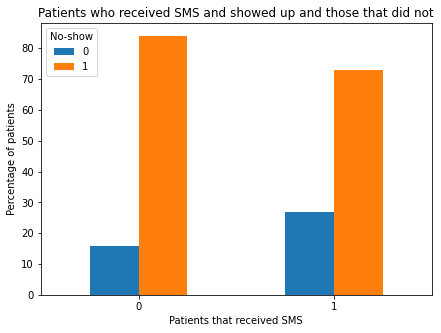

In [25]:
# Plot the relationship between SMS_received and No-show columns using unstack method
df.groupby('SMS_received')['No-show'].value_counts(normalize=True).mul(100).round(2).unstack().plot(kind='bar', figsize=(7,5), rot=0)
plt.title('Patients who received SMS and showed up and those that did not')
plt.xlabel('Patients that received SMS')
plt.ylabel('Percentage of patients');

The above visualization shows the percentage of patients that received SMS and showed up for their appointment which is 73% while the percentage of patients that did not receive SMS but still showed up for their appointment is 84%. This implies that majority of the patients that showed up for their appointments were the ones that did not receive SMS as compared to the ones that received SMS.

In [26]:
def myPercentagePlot(df,xVar):
    '''
    This function will plot the relationship between a selected feature and No-show column using unstack method
    inputs: Two inputs which are the dataframe and any selected feature 
    output: Display a plot of relationship between the selected feature and No-show column in percentage
    '''
    # plot
    # multiply by 100 for percentages
    df.groupby(xVar)['No-show'].value_counts(normalize=True).unstack('No-show').mul(100).plot.bar(edgecolor='black',
                                                                                                   figsize=[7, 5],
                                                                                                   rot=0,
                                                                                                   width=0.8);
    # OPTIONAL: AFTER plotting, clean up variable names
    xVar=xVar.replace("_"," ") # replace _ with a space
    # Add title and format it
    plt.title(f'Percentage Show/No Show by {xVar}'.title(), fontsize = 14, weight = "bold")
    # Add x label and format it
    plt.xlabel(xVar.title(), fontsize = 10, weight = "bold")
    # Add y label and format it
    plt.ylabel('Percentage'.title(), fontsize = 10, weight = "bold")

### Does patients on scholarship show for their appointments or not?

In [27]:
# Relationship between Scholarship and No-show columns using unstack method
df.groupby('Scholarship')['No-show'].value_counts(normalize=True).mul(100).round(2).unstack()

No-show,0,1
Scholarship,,
0,19.26,80.74
1,22.58,77.42


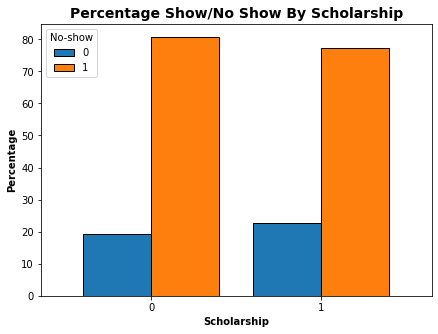

In [28]:
# Plot the relationship between Scholarship and No-show columns
myPercentagePlot(df, 'Scholarship')

The above visualization shows that the percentage of patients on scholarship and did not show up for their appointments is more than the percentage of patients that were not on scholarship but did not show up for their appointments.

### Does patients with chronic diseases show up for their appointments or not?

In [29]:
# Relationship between Hipertension and No-show columns using unstack method
df.groupby('Hipertension')['No-show'].value_counts(normalize=True).mul(100).round(2).unstack()

No-show,0,1
Hipertension,,
0,20.33,79.67
1,16.49,83.51


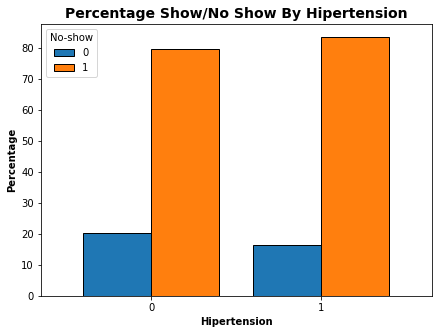

In [30]:
# Plot the relationship between Hipertension and No-show columns
myPercentagePlot(df, 'Hipertension')

The above visualization shows that the percentage of patients with hypertension and show up for their appointments is more than the percentage of patients without hypertension but showed up for their appointments.

In [31]:
# Relationship between Diabetes and No-show columns using unstack method
df.groupby('Diabetes')['No-show'].value_counts(normalize=True).mul(100).round(2).unstack()

No-show,0,1
Diabetes,,
0,19.75,80.25
1,17.21,82.79


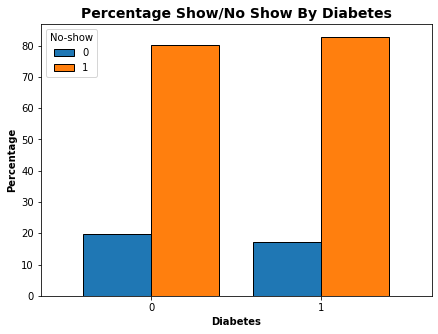

In [32]:
# Plot the relationship between Diabetes and No-show columns
myPercentagePlot(df, 'Diabetes')

The above visualization shows that the percentage of patients with diabetes and show up for their appointments is more than the percentage of patients without diabetes but showed up for their appointments.

In [33]:
# Relationship between Alcoholism and No-show columns using unstack method
df.groupby('Alcoholism')['No-show'].value_counts(normalize=True).mul(100).round(2).unstack()

No-show,0,1
Alcoholism,,
0,19.49,80.51
1,22.97,77.03


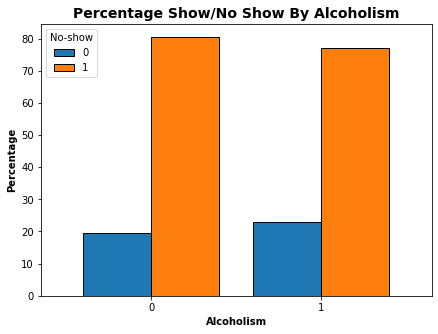

In [34]:
# Plot the relationship between Alcoholism and No-show columns
myPercentagePlot(df, 'Alcoholism')

The above visualization shows the percentage of alcoholic patients that did not show up for their appointments which is 23% while the percentage of non-alcoholic patient that showed up for their appointment is 86%. This implies that majority of the patients that showed up for their appointments were non-alcoholic patients as compared to the patients that were alcoholic.

<a id='conclusions'></a>
## Conclusions
**Results:** The results of my analysis indicates the following:
1. The ages of patients that miss their appointments more fall between the age range of 0 and 40 years. This implies that the younger people miss their appointments more than the elderly ones.
2. Patients that did not receive SMS but showed up for their appointments is higher as compared to the ones that received SMS.
3. Patients with chronic diseases like Hypertension and Diabetes tend to show more for their appointments than those without such chronic diseases.
4. Patients suffering from alcohlism show less for their appointments than the ones not suffering from it.
5. Patients on scholarship miss their appointments more than patients that were not on scholarship.

**Limitations:** The limitations of the dataset I chose for my analysis are as follows:
1. Most of the feature variables in the dataset I chose are categorical and does not allow high level of statistical analysis.
2. The correlation between different features in the dataset are not strong since most features have categorical data.
3. The statistics used in the dataset is descriptive and not inferential, hence I can not create any hypotheses with the data.